## Clean and analyze social media usage data with Python
Hello! <br>

This is my first data analysis project. I took tips from **Clean and analyze social media usage data with Python** from Coursera's course and I'll do my best to show my results. It's a simple project, but I feel it's a perfect start point to improve my knowledges. <br>

I'll use generated data from *random library* then clean and analyze. After, I'll use some visualization libraries to get insinghts from that data.


First of all, we need to import useful libraries like pandas, numpy, random, matplotlib and seaborn.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Generating and transforming data
Once libraries were imported we can start generating our data using the random library. <br> After we transform our data, which is a python dictionary, into a pandas dataframe.

In [2]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Politics']
social_media = ['Facebook', 'X (former Twitter)', 'Threads', 'Instagram']
data = {'Date': pd.date_range('2021-01-01', periods=1000), 'Category': [random.choice(categories) for _ in range(1000                                                                                                                )],
        'Likes': np.random.randint(0, 10000, size=1000), 'Social Media': [random.choice(social_media) for _ in range(1000)]}
df = pd.DataFrame(data)
df

,Date,Category,Likes,Social Media
0,2021-01-01,Travel,8195,Facebook
1,2021-01-02,Food,2211,Instagram
2,2021-01-03,Travel,5703,X (former Twitter)
3,2021-01-04,Travel,3899,Threads
4,2021-01-05,Travel,6554,Threads
...,...,...,...,...
995,2023-09-23,Politics,9542,Facebook
996,2023-09-24,Culture,8016,X (former Twitter)
997,2023-09-25,Politics,1940,Facebook
998,2023-09-26,Music,4682,Threads


#### Analyzing data
When importing data, it's good to check informations about it before working. In this case, we have generated data, which types we already know, but let's check it.

In [3]:
df.dtypes

Date            datetime64[ns]
Category                object
Likes                    int32
Social Media            object
dtype: object

We have datetime (Date), object (Category) and integer (Likes) as dtypes for this dataframe, in this way we can continue our analysis whithout any type transformation. <br>
We can call describe() pandas method to check out basics informations about our dataset.

In [4]:
df.describe()

,Likes
count,1000.000000
mean,5043.931000
std,2833.261229
min,2.000000
25%,2730.500000
50%,5123.500000
75%,7415.500000
max,9986.000000


From this series we can check minimum, maximum, the standard deviation (std) and the main quartiles. <br>
These statistics informations give us a general ideia of our dataset and help us to find better ways to work with. For example, standard deviation is a measure for data variability, i.e its shows us if our data is clustered or spread out. If std is close to mean value, our sample is more clustered, otherwise our sample is spread out. <br>

Since our dataset doesn't need to be cleaned, we can start analyzing it by simple operations and then use these informations to generate graphs and plots for better visualization.

The first operation that we'll use is groupby, which combines our data and makes it's easier to work with.<br>
First of all, we'll groupby by Categories and sum Likes columns to summarize our data. Transforming the resulting Series in a DataFrame makes it's easier to understand and visualize the results.

In [5]:
sum_likes = pd.DataFrame(df.groupby('Category')['Likes'].sum())
sum_likes.sort_values(by='Likes', ascending=False, inplace=True)
sum_likes

,Likes
Category,
Fashion,862608
Fitness,787347
Food,718291
Travel,715219
Music,677523
Culture,646828
Politics,636115


Getting information for each social media is important for investors into tech stock exchange, for this we'll go for groupby operation too. We'll separate data from top two social media in differents dataframes for better visualization and the apply groupby for category and likes.

In [6]:
facebook_data = df[df['Social Media']=='Facebook'] #Data from Facebook
x_twitter_data = df[df['Social Media']=='X (former Twitter)'] #Data from X (former Twitter)
threads_data = df[df['Social Media']=='Threads'] #Data from Threads
instagram_data = df[df['Social Media']=='Instagram'] #Data from Instagram

#Here we'll transform series into dataframes for better visualization (persnoally, I don't like series visualization)
facebook_slikes = pd.DataFrame(facebook_data.groupby('Category')['Likes'].sum())
x_twitter_slikes = pd.DataFrame(x_twitter_data.groupby('Category')['Likes'].sum())
threads_slikes = pd.DataFrame(threads_data.groupby('Category')['Likes'].sum())
instagram_slikes = pd.DataFrame(instagram_data.groupby('Category')['Likes'].sum())
instagram_slikes

,Likes
Category,
Culture,123860
Fashion,166509
Fitness,167394
Food,196353
Music,193274
Politics,119663
Travel,183119


#### Plotting data
Well, we applied groupby operation successfully, now we can plot our data for better visualization. <br>
Since we have a categorical variable, Category, and a numerical variable, Likes, we can use a barplot as follow.

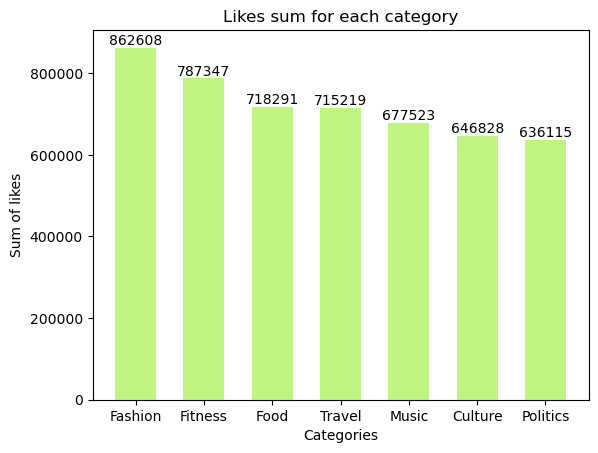

In [7]:
#General data
plt.bar(sum_likes.index, sum_likes['Likes'], width=0.6, color='#BFF483')
plt.xlabel('Categories')
plt.ylabel('Sum of likes')
plt.title('Likes sum for each category')
for i, value in enumerate(sum_likes['Likes']):
    plt.text(sum_likes.index[i], value, str(value), ha='center', va='bottom')
plt.show()

As shown above, Fashion and Culture are the main topics from our data, which indicates those posts sould be most viewed by the users. In this way, digital influencers and social media staff must look at these topics to increase their engagement. <br>

Now we'll look for each social media separately to get insights for social media staff and investors whose into technology stock exchange.<br>
Before plotting these data, we'll sort values by likes.

In [22]:
sum_social_media = pd.DataFrame(df.groupby('Social Media')['Likes'].sum())
sum_social_media.sort_values(by='Likes', ascending=False, inplace= True)
sum_social_media

,Likes
Social Media,
X (former Twitter),1379918
Facebook,1256924
Threads,1256917
Instagram,1150172


From this dataframe we have X and Facebook as the top two social media, then we'll work with both to get more informations. <br>

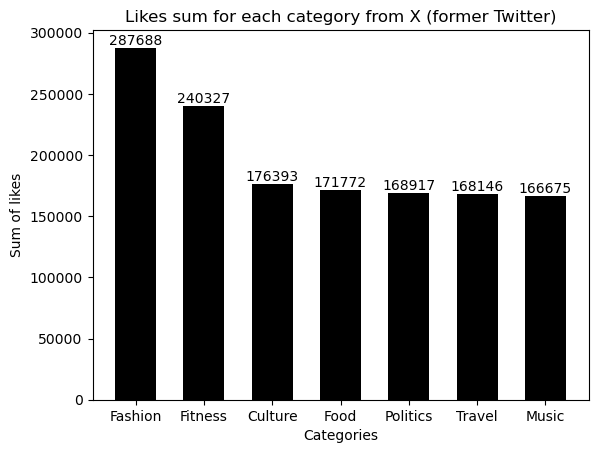

Standard deviation: Likes    47790.06
dtype: float64
Mean:Likes    197131.14
dtype: float64


In [32]:
#X (former Twitter) data
x_slikes_std = round(x_twitter_slikes.std(), 2)
x_slikes_mean = round(x_twitter_slikes.mean(), 2)
x_twitter_slikes.sort_values(by='Likes', ascending=False, inplace=True)
plt.bar(x_twitter_slikes.index, x_twitter_slikes['Likes'], width=0.6, color='#000000')
plt.xlabel('Categories')
plt.ylabel('Sum of likes')
plt.title('Likes sum for each category from X (former Twitter)')
for i, value in enumerate(x_twitter_slikes['Likes']):
    plt.text(x_twitter_slikes.index[i], value, str(value), ha='center', va='bottom')
plt.show()
print(f'Standard deviation: {x_slikes_std}')
print(f'Mean: {x_slikes_mean}')

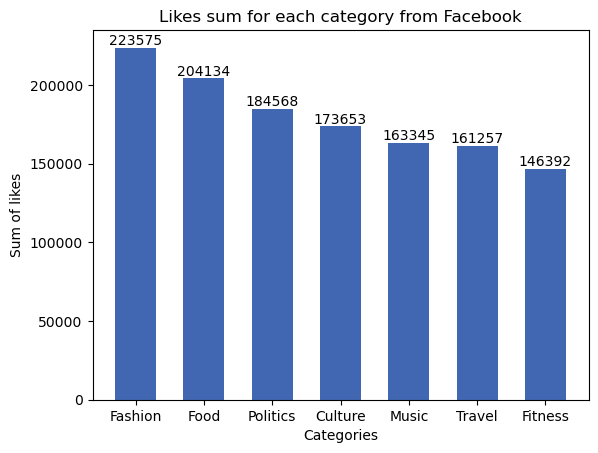

Standard deviation: Likes    26768.19
dtype: float64
Mean: Likes    179560.57
dtype: float64


In [33]:
#Facebook data
facebook_slikes_std = round(facebook_slikes.std(), 2)
facebook_slikes_mean = round(facebook_slikes.mean(), 2)
facebook_slikes.sort_values(by='Likes', ascending=False, inplace=True)
plt.bar(facebook_slikes.index, facebook_slikes['Likes'], width=0.6, color='#4267B2')
plt.xlabel('Categories')
plt.ylabel('Sum of likes')
plt.title('Likes sum for each category from Facebook')
for i, value in enumerate(facebook_slikes['Likes']):
    plt.text(facebook_slikes.index[i], value, str(value), ha='center', va='bottom')
plt.show()
print(f'Standard deviation: {facebook_slikes_std}')
print(f'Mean: {facebook_slikes_mean}')

We could use describe() method for both dataframes, but our plot gave us a good view from data. <br>

On X (former Twitter) the main two topics from our data are Fashion and Fitness. On the other hand, on Facebook the mains topics are Fashion and Food. <br>
Since we have standard deviation and mean values for both social media, we can see that X data are more clustered than Facebook's data. <br>
Summarizing, Fashion posts are most likely to increase engagement for both social media.
